In [89]:
import tweepy
import csv
import pandas as pd
from tweepy import OAuthHandler
from tweepy import Stream
from tweepy import OAuthHandler
from tweepy.streaming import StreamListener
import matplotlib.pyplot as plt
import numpy as np
from textblob import TextBlob
import os 
import pandas as pd
import os
import os
import pandas as pd
import numpy as np
import csv
from pandas import DataFrame
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from collections import Counter
from string import punctuation
import nltk
from string import punctuation
from operator import itemgetter
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import NMF, LatentDirichletAllocation
from nltk.tokenize import sent_tokenize, word_tokenize
ps = PorterStemmer()
import string 
from collections import Counter
from nltk import word_tokenize, pos_tag, pos_tag_sents
import matplotlib.pyplot as plt
from collections import Counter
import pandas as pd
import nltk

####input your credentials here
consumer_key = 'w99pOAUdCATwkX4FNG1G5geNN'
consumer_secret = '8O2hMgDd3EFz3V5PvRXafFIVjGMUxkD7zU0d5ASK3DRgpzO9Ml'
access_token = '2835481326-Dg6K5CPl5GDITtshwzLzP8U9UpKjJf9szH2FOkE'
access_token_secret = '7E3hevW7w1WQTRdsoaWlv7dGQ9etbXdoIzkiKeD7ROLwO'

auth = OAuthHandler(consumer_key,consumer_secret)
api = tweepy.API(auth)
auth.set_access_token(access_token, access_token_secret)

In [21]:
tweet_topics = ["#organicfood","#organicfoods","#organicmilk","#organicatta",
               "#organicproducts","#organicbeautyproducts","#fakeorganic","#fakeorganicproduct",
               "#fakeorganicfoods"]


In [42]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth,wait_on_rate_limit=True)
#####United Airlines
# Open/Create a file to append data
csvFile = open('pos.csv', 'a')
csvFile1 = open('neg.csv', 'a')

#Use csv Writer
csvWriter = csv.writer(csvFile)
csvWriter1 = csv.writer(csvFile1)

followers_count = []
location = []
author_id = [] 
polarity = []
count = 0
for i in range(len(tweet_topics)):
    for tweet in tweepy.Cursor(api.search,q=tweet_topics[i],count=100,
                               lang="en",
                               since="2017-04-03").items():
        count = count + 1
        followers_count.append(tweet.author.followers_count)
        location.append(tweet.author.location)
        author_id.append(tweet.author.id)
        sentiment = TextBlob(tweet.text)
        polarity.append(sentiment.sentiment.polarity)
        if sentiment.sentiment.polarity > 0:
            csvWriter.writerow([tweet.created_at, tweet.text.encode('utf-8')])
        elif sentiment.sentiment.polarity < 0:
            csvWriter1.writerow([tweet.created_at, tweet.text.encode('utf-8')])

              Frequency
Word                   
b'rt               1658
#organicfood        546
organic             357
food                246
free                204
new                 185
'                   183
#organic            182
-                   176
100%                159


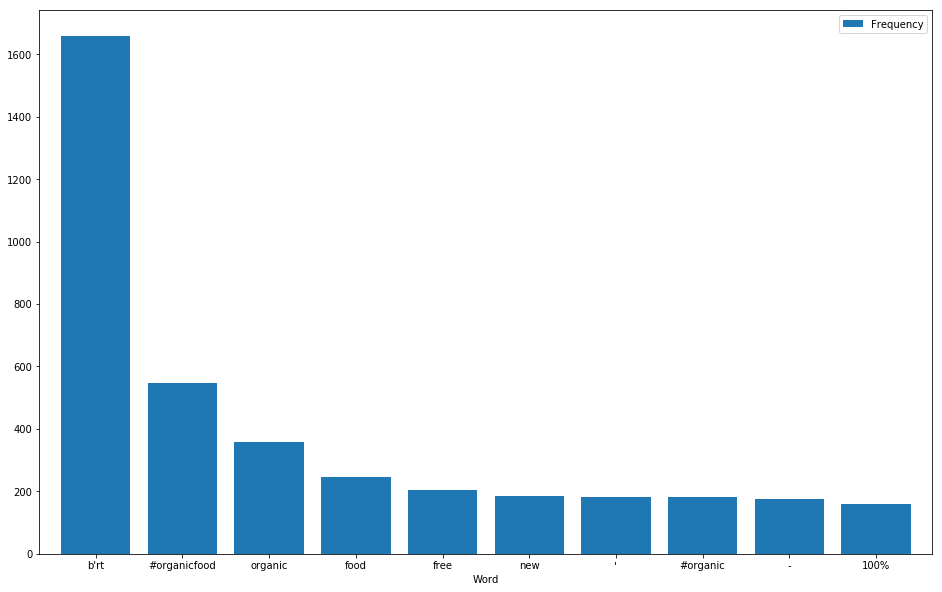

In [114]:
positive = pd.read_csv('pos.csv', header=None)
positive[1] = positive[1].str.replace('http\S+|www.\S+', '', case=False)
positive[1] = positive[1].str.replace('b"rt', '', case=False)

top_N = 10

df = positive[1]

stopwords = nltk.corpus.stopwords.words('english')
# RegEx for stopwords
RE_stopwords = r'\b(?:{})\b'.format('|'.join(stopwords))
# replace '|'-->' ' and drop all stopwords
words = (df
           .str.lower()
           .replace([r'\|', RE_stopwords], [' ', ''], regex=True)
           .str.cat(sep=' ')
           .split()
)

# generate DF out of Counter
rslt = pd.DataFrame(Counter(words).most_common(top_N),
                    columns=['Word', 'Frequency']).set_index('Word')
print(rslt)

# plot
rslt.plot.bar(rot=0, figsize=(16,10), width=0.8)
plt.show()

                           Frequency
Word                                
b'rt                             201
#organicfood                     100
organic                           64
b"rt                              47
'                                 39
green                             34
#organic                          33
food                              32
@martindotorg:                    20
\xe2\x80\xa6'                     19
raw                               19
&amp;                             17
see                               14
@mebrahtu1k:                      13
check                             13
chicken                           12
small                             11
#organicfood'                     11
less                              10
hard                              10
products                          10
go                                10
grassfed                          10
@that_bflyeffect:                 10
shopping                          10
e

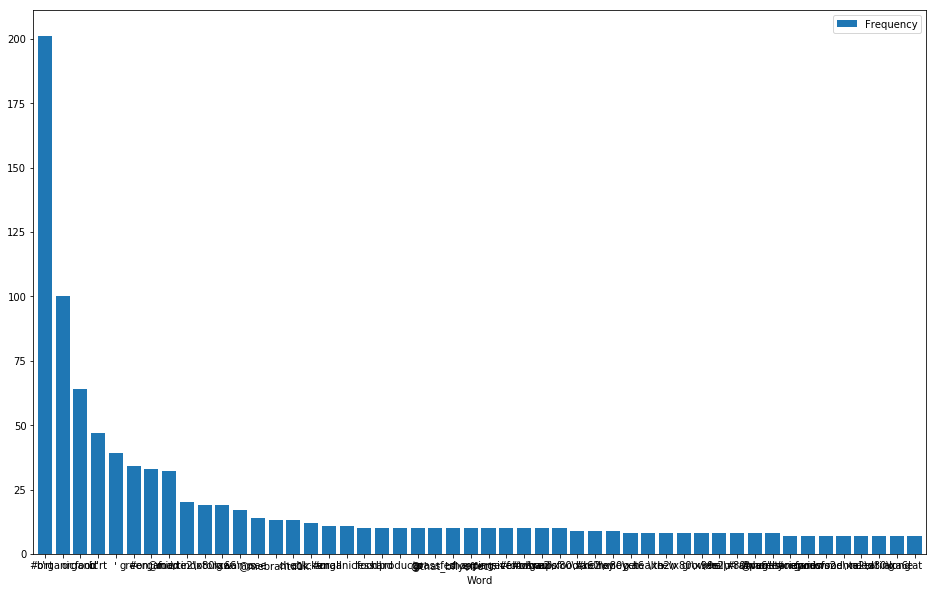

In [116]:
negative = pd.read_csv('neg.csv',header=None)
negative[1] = negative[1].str.replace('http\S+|www.\S+', '', case=False)
negative[1] = negative[1].str.replace('-', '', case=False)
negative[1] = negative[1].str.replace('\xe2\x80\xa6', '', case=False)

top_N = 50

df = negative[1]

stopwords = nltk.corpus.stopwords.words('english')
# RegEx for stopwords
RE_stopwords = r'\b(?:{})\b'.format('|'.join(stopwords))
# replace '|'-->' ' and drop all stopwords
words = (df
           .str.lower()
           .replace([r'\|', RE_stopwords], [' ', ''], regex=True)
           .str.cat(sep=' ')
           .split()
)

# generate DF out of Counter
rslt = pd.DataFrame(Counter(words).most_common(top_N),
                    columns=['Word', 'Frequency']).set_index('Word')
print(rslt)

# plot
rslt.plot.bar(rot=0, figsize=(16,10), width=0.8)
plt.show()

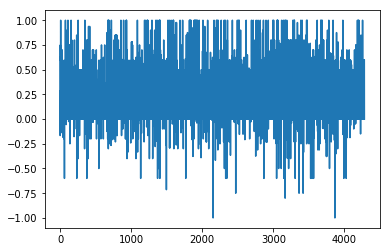

0.20056450127694034

In [115]:
plt.plot(polarity)
plt.show()
np.mean(polarity)
